In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV


In [2]:
# Load the cleaned dataset
df = pd.read_csv('CVD_cleaned.csv')

In [3]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)



In [4]:
# Define the target variable (Heart Disease) and features
X = df_encoded.drop(['Heart_Disease_Yes'], axis=1)  # Features
y = df_encoded['Heart_Disease_Yes']  # Target


In [5]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Instantiate the Random Forest Classifier
rf_model = RandomForestClassifier()

# Use RandomizedSearchCV to search for the best parameters
random_search = RandomizedSearchCV(estimator=rf_model, 
                                   param_distributions=param_grid, 
                                   n_iter=5,  # Number of random combinations to try
                                   cv=3,        # 3-fold cross validation
                                   verbose=2, 
                                   random_state=42, 
                                   n_jobs=-1)   # Use all available cores

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


c:\Users\jacob\anaconda4\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jacob\anaconda4\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jacob\anaconda4\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\jacob\anaconda4\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jacob\anaconda4\Lib\site-packages\sk

Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


In [7]:
# Train a Random Forest model using the best parameters
best_rf_model = RandomForestClassifier(**random_search.best_params_)

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50)

In [8]:
# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

       False       0.92      1.00      0.96     56774
        True       0.57      0.01      0.02      4997

    accuracy                           0.92     61771
   macro avg       0.75      0.50      0.49     61771
weighted avg       0.89      0.92      0.88     61771



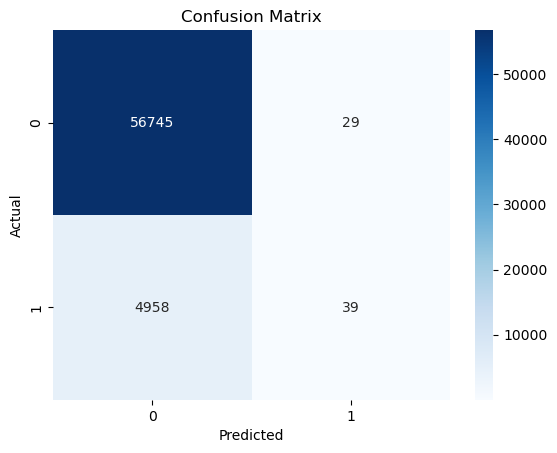

In [9]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


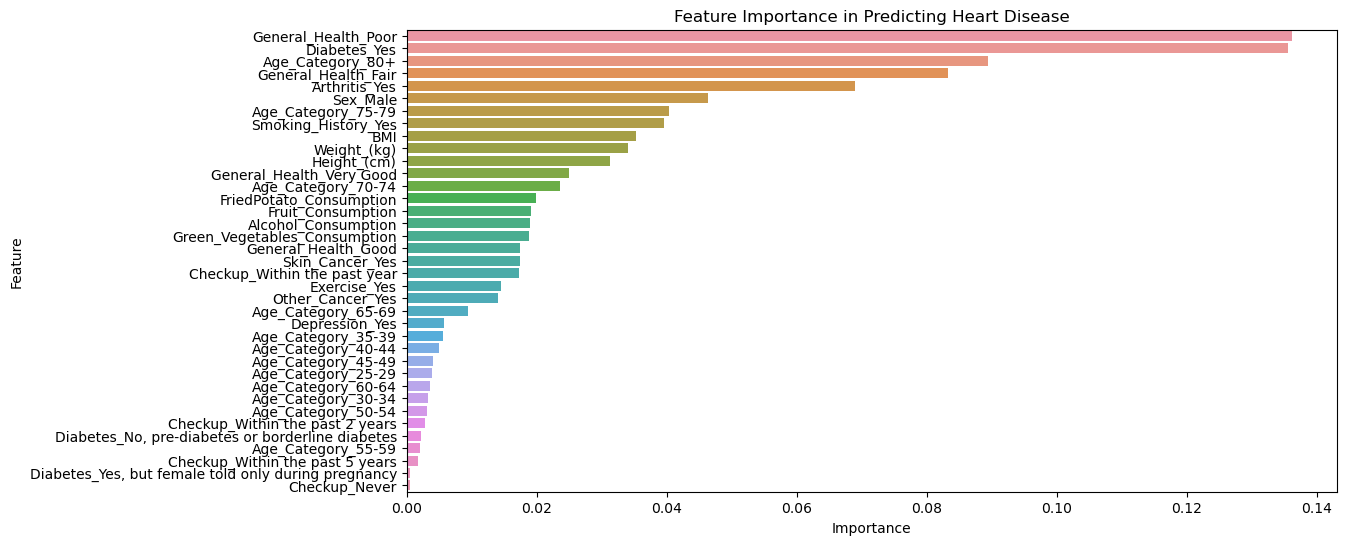

In [10]:
# Check feature importance
feature_importances = best_rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance in Predicting Heart Disease')
plt.show()
